# Tools for Data Science 
# Clustering 1 - Exercises

## 1. Conceptual Questions

## Task 1.1

Explain the differnece between "supervised" and "unsupervised" machine learning.

**Your answer goes here** : Supervised machine learning refers to machine learning algorithms that utilize labeled datasets for training. With labeled training data, it is possible to determine a model's accuracy. After training, a model is expected to make accurate predictions on unseen data. Unsupervised learning refers to methods that work with unlabeled data. Unsupervised learning is used to find patterns or similarities in unlabeled data.

## Task 1.2

Explain in detail how K-Means Clustering works (you might find it helpful to include a sample picture in your answer so you have some points to refer to).

![K-Means clustering example](kmeans.png)
**Your answer goes here** : K-Means starts by randomly selecting a number of points in a dataset. These points start out as the cluster centroids. The centroids are labeled as X's in the figure above. Then, for each data point, the distance from a point to each of the K centroids is calculated. Based on this distance, a cluster is assigned to a data point whose centroid is closest to it. From here, there are now K clusters. At this point, everything should be in a cluster, and the centroids should be recalculated by taking the mean of all the data points assigned to each cluster. These steps are repeated until the centroids stop changing significantly, or when we reach a desired number of iterations. Then, the algorithm spits out the final cluster centroids and each of the classifications. 


## 2. Applied Questions: K-Means Clustering

Let's try k-means on the penguins dataset. 

1. Apply k-means on the penguins dataset
2. Plot the dataset with the cluster labels. Are they similar to the ground truth? 
3. Calculate homogeneity, completeness, and v_measure score. How good is the clustering?

Use the following numerical attributes: 
```
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
```

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


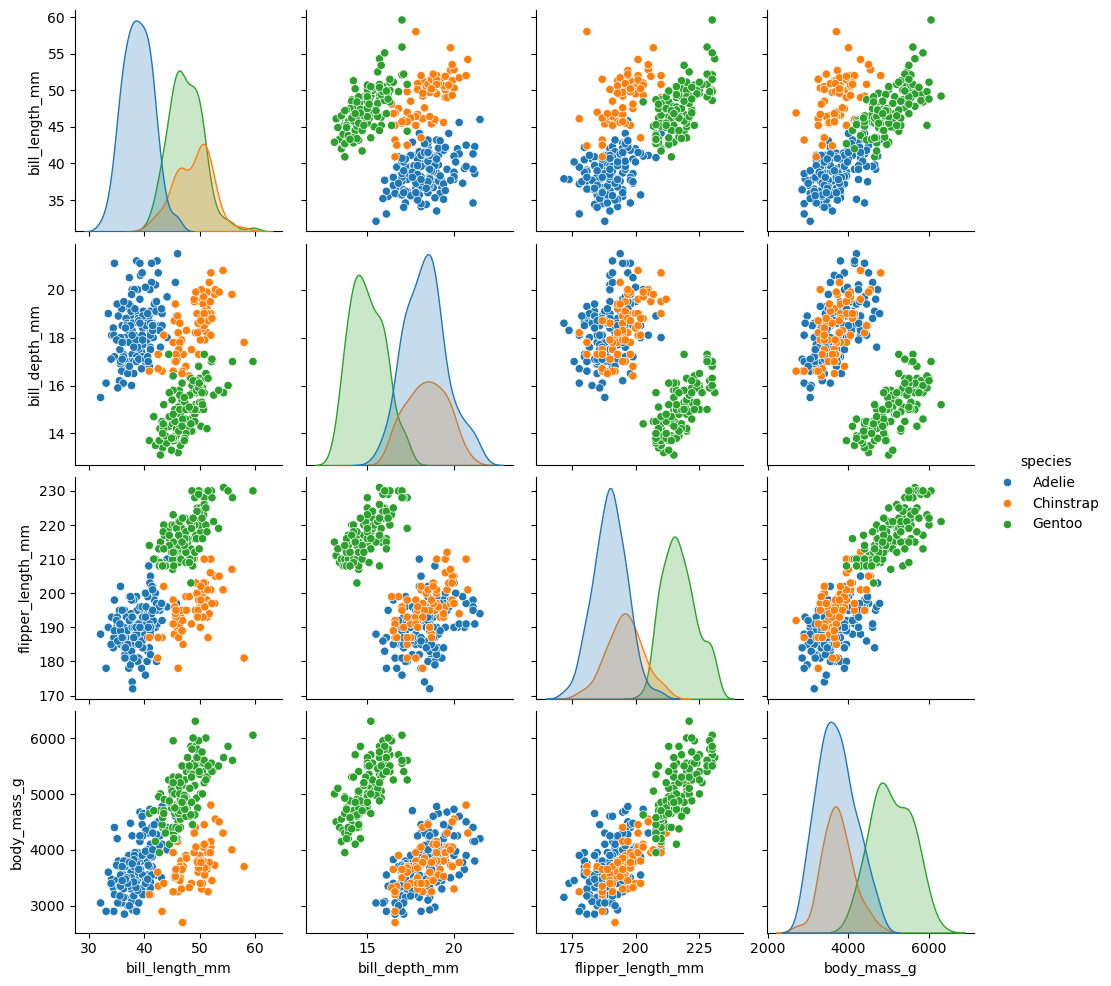

In [9]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score


penguins = sns.load_dataset("penguins")

sns.pairplot(data=penguins, hue="species")
penguins = penguins.dropna()
penguins.head()

Homogeneity: 0.401
Completeness: 0.405
V-Measure: 0.403
Silhouette Score: 0.575


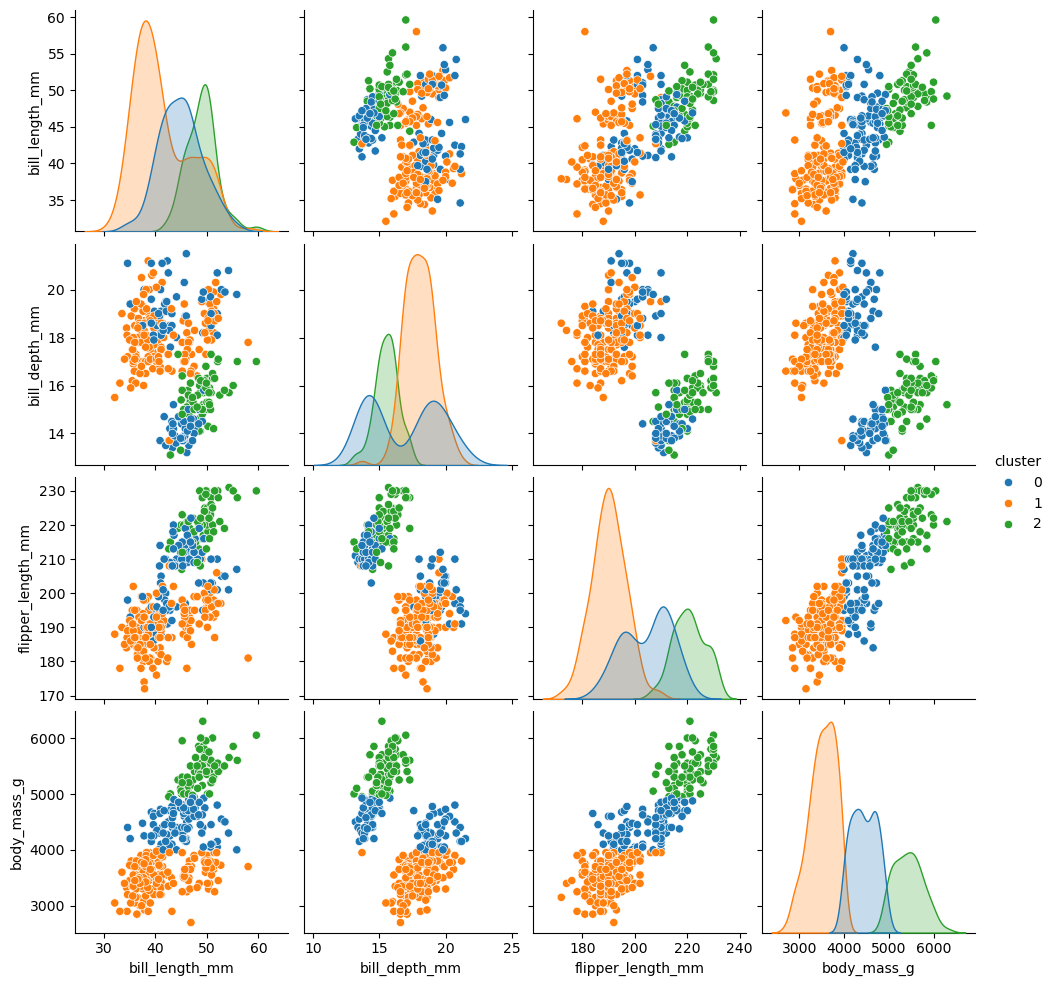

In [ ]:
# Your code goes here

features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X = penguins[features]

# q1 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
penguins["cluster"] = kmeans.fit_predict(X)

# q2
sns.pairplot(data=penguins, vars=features, hue="cluster", palette="tab10")
true_labels = penguins["species"].astype("category").cat.codes # Convert species to numerical labels (to work with metrics functions)
predicted_labels = penguins["cluster"]

# q3
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
# Calculate the homogeneity, completeness, and V-measure scores
homogeneity = homogeneity_score(true_labels, predicted_labels)
completeness = completeness_score(true_labels, predicted_labels)
v_measure = v_measure_score(true_labels, predicted_labels)

print("Homogeneity:", round(homogeneity, 3))
print("Completeness:", round(completeness, 3))
print("V-Measure:", round(v_measure, 3))

sil_score = silhouette_score(X, predicted_labels)
print("Silhouette Score:", round(sil_score, 3))

The k-means clusters are somewhat similar to the ground truth species but not a perfect match. Visually, one cluster aligns well with a distinct species like Gentoo, while the others show overlap, particularly between Adelie and Chinstrap. This is supported by the evaluation metrics, where homogeneity, completeness, and v-measure are all around 0.40, indicating moderate alignment. Overall, the clustering captures some structure in the data.

The homogeneity and completeness scores are both around 0.40, which means the clusters K-Means found contain about 40% pure species and that about 40% of each species is grouped together correctly. The v-measure reflects this with a similar score. This shows that while the clustering isn’t perfect, there is some meaningful structure being picked up. The silhouette score is 0.575, which I assume is decent but not great. This score indicates that the clusters are well-separated from each other in the feature space, even if they don’t line up perfectly with the actual species labels.